In this article, I want to share one simple problem that I've encountered in the calculus book and one beautiful result that could be obtained from it.

### Problem

Problem from the Stewart Calculus book, 7th edition, Excercice 11.2, Problem 63

> The figure shows two circles \\(C\\) and \\(D\\) of radius 1 that touch
at \\(P\\). \\(T\\) is a common tangent line; \\(C_1\\) is the circle that touches
\\(C\\), \\(D\\), and \\(T\\); \\(C_2\\) is the circle that touches \\(C\\), \\(D\\), and \\(C_1\\); \\(C_3\\) is
the circle that touches \\(C\\), \\(D\\), and \\(C_2\\). This procedure can be
continued indefinitely and produces an infinite sequence of
circles 􏰗\\(C_n\\)􏰙. Find an expression for the diameter of \\(C_n\\).

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


ggplot_colors = plt.rcParams['axes.prop_cycle']
colors = np.array([c['color'] for c in ggplot_colors])

blue = colors[0]
green = colors[2]
red = colors[3]

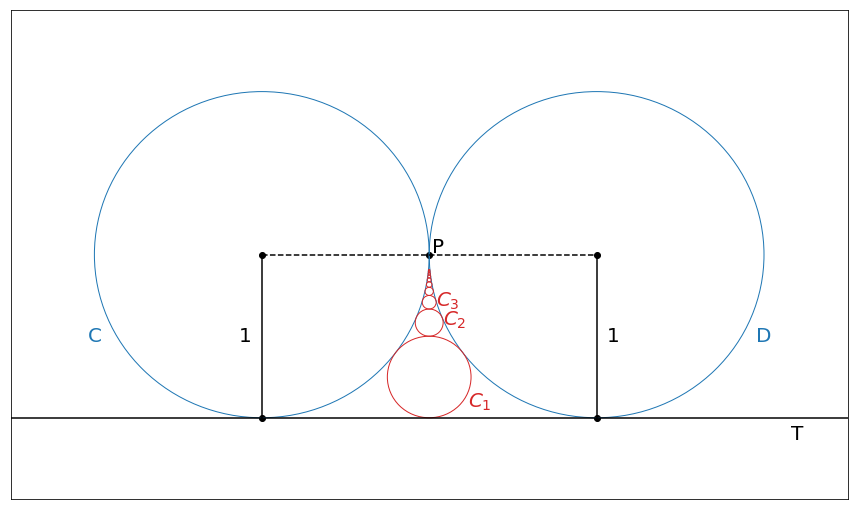

In [23]:

def text(x, y, string, color="black"):
    plt.text(
        x, y, string,
        horizontalalignment='center',
        verticalalignment='center',
        color=color,
        fontsize=20,
    )

def draw_base_image():
    ggplot_colors = plt.rcParams['axes.prop_cycle']
    plt.figure(figsize=(15, 9))
    ax = plt.gca()

    ax.add_artist(plt.Circle((1, 1), 1, fill=False, color=blue))  # right-base circle
    ax.add_artist(plt.Circle((-1, 1), 1, fill=False, color=blue))  # left-base circle
    plt.plot([-3, 3], [0, 0], color="black")

    center = 0
    for n in range(1, 11):
        diameter = 1 / (n * (n + 1))
        radius = 0.5 * diameter

        ax.add_artist(plt.Circle((0, center + radius), radius, fill=False, color=red))  # n-th circle
        center += diameter

    plt.xlim(-2.5, 2.5)
    plt.ylim(-0.5, 2.5)
    plt.xticks([], [])
    plt.yticks([], [])
    
def lines_and_points(short=True):
    points = np.array([
        [0, 1],
        [-1, 1],
        [1, 1],
        [-1, 0],
        [1, 0],
    ])
    plt.scatter(*points.T, color="black")
    
    plt.plot([-1, -1], [0, 1], color="black")
    plt.plot([1, 1], [0, 1], color="black")
    
    if short:
        plt.plot([-1, 0], [1, 1], "--", color="black")
    else:
        plt.plot([-1, 1], [1, 1], "--", color="black")
    
    text(-1.1, 0.5, "1")
    text(1.1, 0.5, "1")
    
def notations():
    text(0.05, 1.05, "P")
    text(2.2, -0.1, "T")
    text(-2, 0.5, "C", color=blue)
    text(2, 0.5, "D", color=blue)
    
    text(0.3, 0.1, "$C_1$", color=red)
    text(0.15, 0.6, "$C_2$", color=red)
    text(0.11, 0.72, "$C_3$", color=red)

draw_base_image()
notations()
lines_and_points(short=False)
plt.show()

### Solution

The problem is relatively easy to solve. We can find diameter of the \\(C_1\\) circle very easily. Note that \\(P\\), center of the \\(D\\) circle and circle of the \\(C_1\\) form a right triangle.

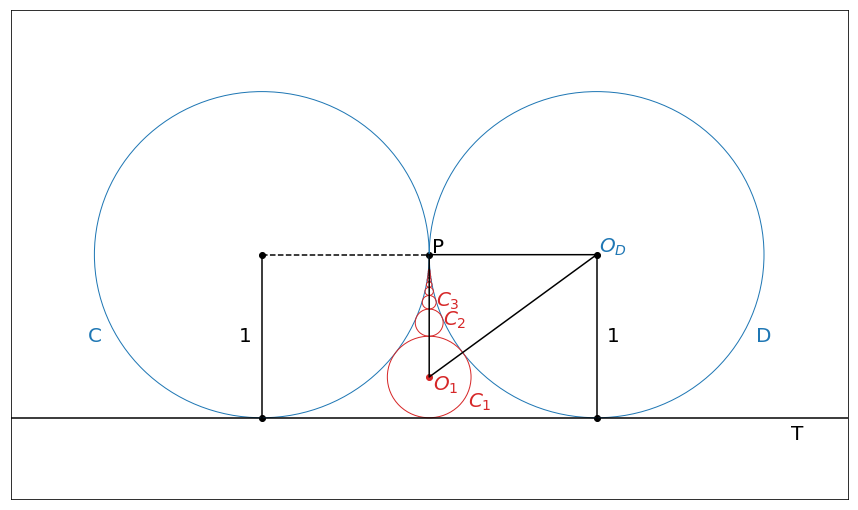

In [24]:
draw_base_image()
lines_and_points()
notations()

text(1.1, 1.05, "$O_D$", color=blue)
plt.plot([0, 1, 0, 0], [1, 1, 0.25, 1], color="black")
plt.scatter([0], [0.25], color=red)
text(0.1, 0.2, "$O_1$", color=red)

plt.show()

We can assume that radius of the \\(C_1\\) circle is equal to \\(r_1\\). Then, \\(PO_D=1\\) (by definition), \\(PO_1=1-r_1\\) and \\(O_DO_1=1+r_1\\). From Pythogorean theorem we get

$$
(1 + r_1)^2 = 1 + (1 - r_1) ^ 2
$$

After simple manipulations we get that \\(r_1=1/4\\) and diameter \\(d_1=1/2\\).

We can do the same trick to find radius for all other circles using recursive formula. Note that \\(O_DO_n=1 + r_n\\), \\(PO_D=1\\) and  \\(PO_n=1 - r_n - \sum_{i=1}^{n-1}d_i\\)

If we say that \\(a_n=1 - \sum_{i=1}^{n-1}d_i\\) then \\(r_n\\) can be derived from the following formula

$$
(1 + r_n)^2 = 1 + (a_n - r_n) ^ 2
$$

and we can easily show that

$$
r_n = \frac{a_n^2}{2(a_n + 1)}
$$

From the definition of \\(a_n\\) it follows that

$$
\begin{align}
a_n &= 1 - \sum_{i=1}^{n-1}d_i \\
    &= a_n=1 - \sum_{i=1}^{n-2}d_i - d_{n-1} \\
    &= a_{n-1} - d_{n-1} \\
    &= a_{n-1} - 2r_{n-1} \\
\end{align}
$$

If we substitute \\(r_{n-1}\\) into the previous formula we will get recursive definition of the \\(a_n\\)
$$
a_n = a_{n-1} - \frac{a_{n-1}^2}{(a_{n-1} + 1)} = \frac{a_{n-1}}{a_{n-1}+1}
$$

If we try to generate a few first values we can easily spot the pattern \\(a_1=1\\), \\(a_2=1/2\\), \\(a_3=1/3\\), ... We can conjecture that \\(a_{n}=1/n\\) and this can be proved by induction

1. \\(a_1 = 1\\)
2. \\(a_n = \frac{1}{n}\\)
3. and finally we can show that \\(a_{n+1} = \frac{1}{n+1}\\)

$$
a_{n+1}=\frac{a_n}{a_n+1}=\frac{\frac{1}{n}}{\frac{1}{n} + 1} = \frac{\frac{1}{n}}{\frac{n+1}{n}} = \frac{1}{n+1}
$$

We can use formula for \\(a_n\\) to get formula for \\(r_n\\)


$$
r_n = \frac{a_n^2}{2(a_n + 1)} = \frac{\frac{1}{n^2}}{2(\frac{1}{n} + 1)} = \frac{1}{2 \, n\, (n+1)}
$$

or

$$
d_n = \frac{1}{n(n+1)}
$$

### Going further

Problem is quite simple and it's probably not very interesting by itself (although, visual represenation of the sequence obtained from the \\(d_n\\) values is quite beautiful), there is something interesting happens when we plug non-positive numbers into the final formula

For \\(n=0\\) expression is undefined, but if we consider it's value in the limit then we get

$$
\lim_{n \to 0} \frac{1}{n(n+1)} = \infty
$$

This is an interesting conclusion. This formula says that there is a circle with an infinite radius that touches circles \\(C\\) and \\(D\\). Circle with infinite radius is just a line, in the previous images, this is just a line \\(T\\)

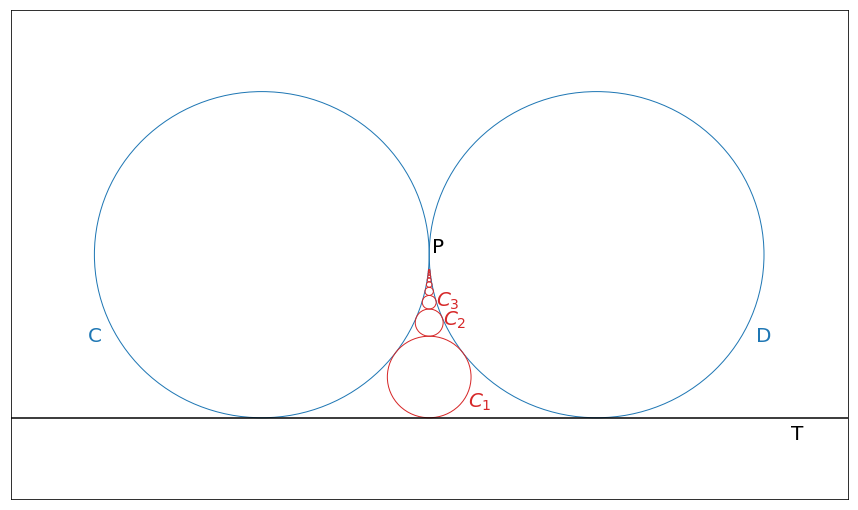

In [25]:
draw_base_image()
notations()
plt.show()

Let's continue, and try try negative values as well. For \\(n=-1\\) value is also undefined, but in the limit we get another circle with an infinite radius

$$
\lim_{n \to -1} \frac{1}{n(n+1)} = \infty
$$

Now, this formula says that there is another circle with infinite radius that touches both circles \\(C\\) and \\(D\\). There is one place where this circle can exist and it has to be a line \\(U\\) that placed on top of the circles \\(C\\) and \\(D\\).

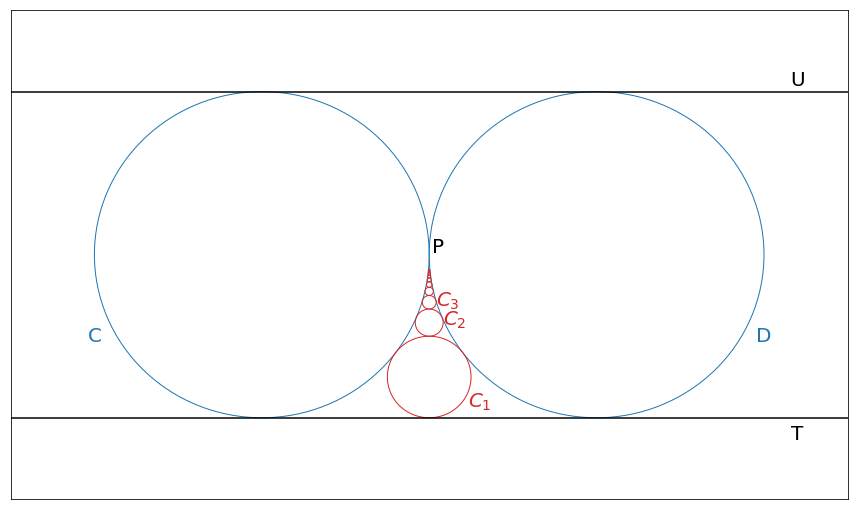

In [6]:
draw_base_image()
notations()

plt.plot([-3, 3], [2, 2], color="black")
text(2.2, 2.07, "U")
plt.show()

We can keep going and find diameters for some other circles, for example, \\(d_{-2}=1/2\\), \\(d_{-3}=1/6\\), \\(d_{-4}=1/12\\), ... We can notice that in general we get the same sequence as before since \\(d_n=d_{-n-1}\\). Basically, this sequence says that there is another set of infinite number of circles with negative indices that corresponds to exactly one circle with a positive index and they share the same properties. We can extend our previous images with the new sequence of circles

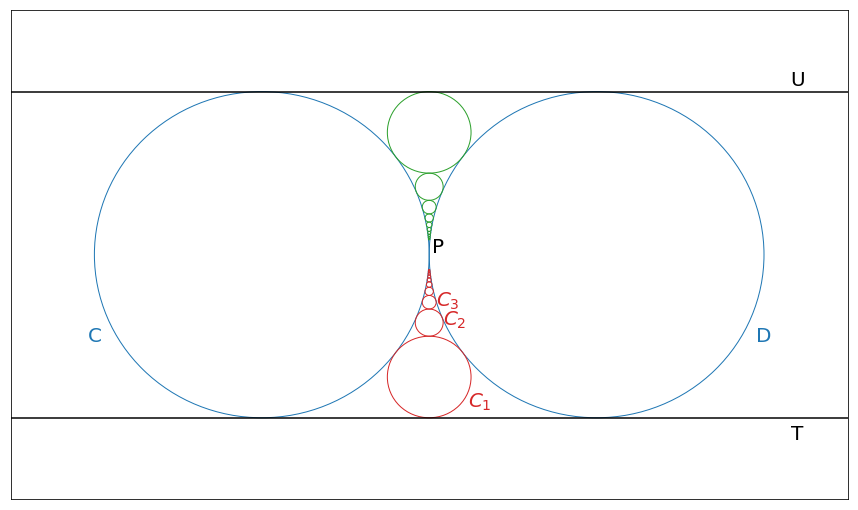

In [7]:
def negative_index_circles():
    ax = plt.gca()
    plt.plot([-3, 3], [2, 2], color="black")
    text(2.2, 2.07, "U")

    center = 2
    for n in range(-2, -12, -1):
        diameter = 1 / (n * (n + 1))
        radius = 0.5 * diameter

        ax.add_artist(plt.Circle((0, center - radius), radius, fill=False, color=green))  # n-th circle
        center -= diameter
        
draw_base_image()
notations()
negative_index_circles()
plt.show()

The sequence of circles is very intersting, since each circle with a finite radius touches exactly 4 other circles. Each circles touches \\(C\\) and \\(D\\) circles, in adition, in sequence there is always one circles on top of each circles and one below it. Even a circle at point \\(P\\) (circle with 0 radius) should touch one circle above it and below it (based on the way sequence was created) and this point is a point of contact between circles \\(C\\) and \\(D\\). This pattern breaks for circles with infinite radiuses since they expand in opposite diretions and they have only 3 points of contact. 



### Transforming the space

This problem bothered me for a while, since this is a beautiful mathematical pattern that breaks at one point and creates two unplesent exceptions. I tried to find a nice way of reformulating this problem in the way that can allow beutiful pattern to emerge in some similar representation of the same problem. Soon after, I discovered one trick used to prove Ptolemy's theorem. [Numberphile channel](https://www.youtube.com/channel/UCoxcjq-8xIDTYp3uz647V5A) published a [video](https://youtu.be/bJOuzqu3MUQ) that discussed a very interesting topic of a circle inversion. This topic allowed me to find much better representation to the problem. The idea is known as **inversion in a circle** (from the [Excursion Through Inversion](http://jwilson.coe.uga.edu/EMT600/STORAGE/Inversion/inversion.html) article). 

> An inversion in a circle, informally, is a transformation of a plane that flips the circle inside-out. That is, points outside the circle get mapped to points inside the circle and points inside the circle get mapped outside the circle

### Inversion in a circle

We want to invert space in such a way that every point from inside a circle maps to a point outside of the circle. And vice versa, every point from outside the circle, maps to a point inside the circle.

There are three main properties of this inversion that we will use in order to reformulate our initial problem.

1. Each point on the the circumference of the circle relative to which we apply inversion maps to intself.

2. Each line maps to a circle that goes through the center of a circle relative to which we apply inversion

3. Each circle maps to a circle that doesn't go thorugh the center of a circle relative to which we apply inversion

We can fix one of the circles with a unit radius and do inversion realtive to it. For example, we can start with a circle \\(C\\). First, we can map two lines into the circle \\(C\\), namely \\(U\\) and \\(T\\).

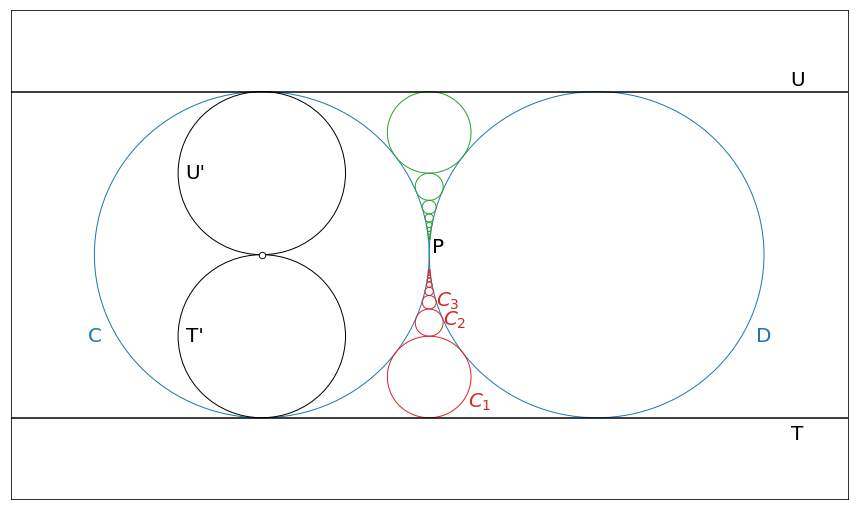

In [26]:
draw_base_image()
notations()
negative_index_circles()

ax = plt.gca()

ax.add_artist(plt.Circle((-1, 1.5), 0.5, fill=False, color="black"))  # U' circle
text(-1.4, 1.5, "U'")

ax.add_artist(plt.Circle((-1, 0.5), 0.5, fill=False, color="black"))  # T' circle
text(-1.4, 0.5, "T'")

plt.scatter([-1], [1], s=40, color="black")
plt.scatter([-1], [1], s=20, color="white", zorder=100)

plt.show()

Then we can map circle \\(D\\) to a circle inside the \\(C\\) circle (we can call this circle \\(D'\\))

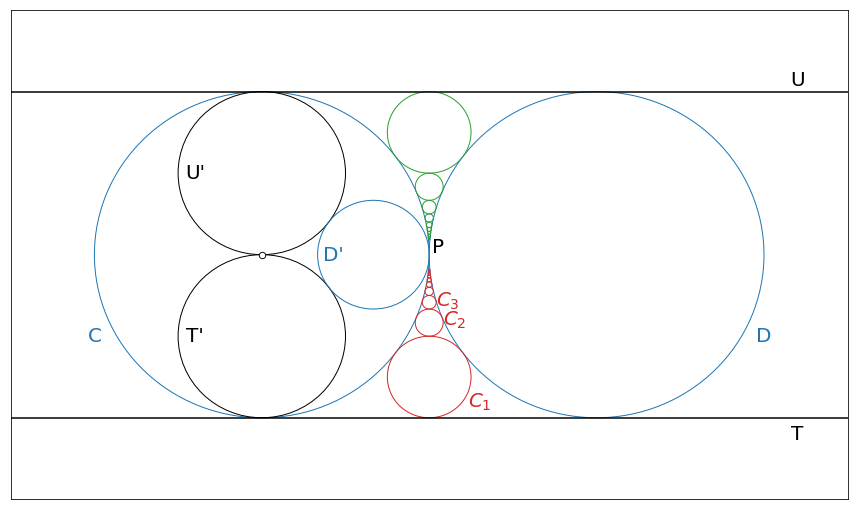

In [27]:
draw_base_image()
notations()
negative_index_circles()

ax = plt.gca()

ax.add_artist(plt.Circle((-1, 1.5), 0.5, fill=False, color="black"))  # U' circle
text(-1.4, 1.5, "U'")

ax.add_artist(plt.Circle((-1, 0.5), 0.5, fill=False, color="black"))  # T' circle
text(-1.4, 0.5, "T'")

ax.add_artist(plt.Circle((-1/3, 1), 1/3, fill=False, color=blue))  # D' circle
text(-0.57, 1, "D'", color=blue)

plt.scatter([-1], [1], s=40, color="black")
plt.scatter([-1], [1], s=20, color="white", zorder=100)
    
plt.show()

And finally, we can apply the same logic to re-map each green and red circle in the same way.

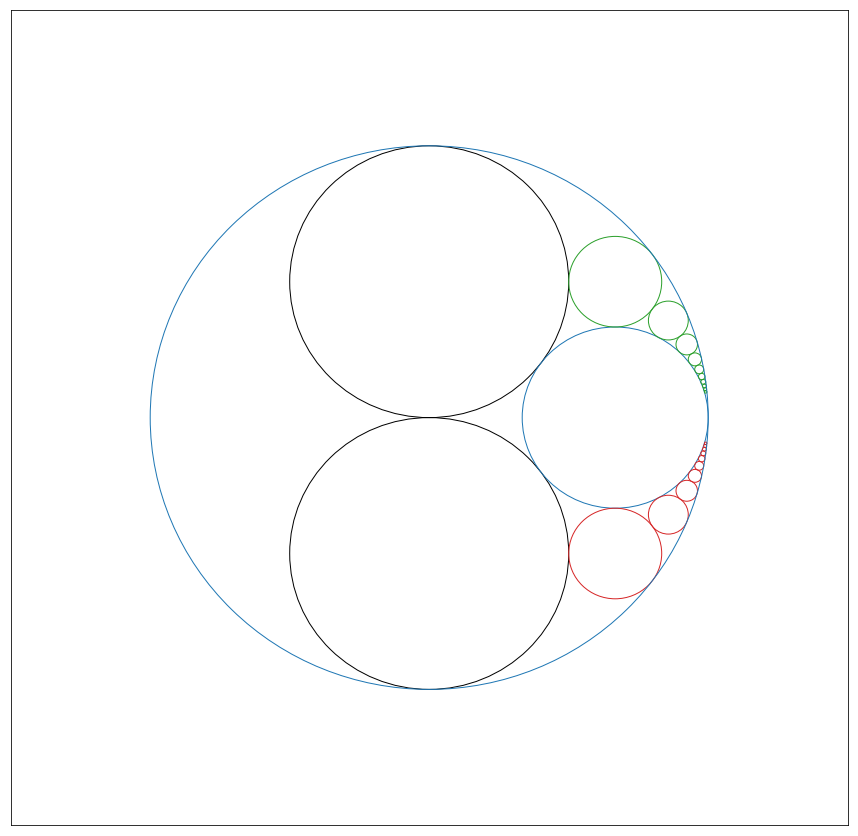

In [28]:
plt.figure(figsize=(15, 15))
    
ax = plt.gca()

ax.add_artist(plt.Circle((-1, 1.5), 0.5, fill=False, color="black"))  # U' circle
ax.add_artist(plt.Circle((-1, 0.5), 0.5, fill=False, color="black"))  # T' circle
ax.add_artist(plt.Circle((-1/3, 1), 1/3, fill=False, color=blue))  # D' circle

center_point = 0
for n in range(1, 11):
    diameter = 1 / (n * (n + 1))
    radius = 0.5 * diameter
    
    inverted_diameter = 1 / (n * (n + 1) + 1)
    inverted_radius = 0.5 * inverted_diameter
    
    rotation_angle = np.pi/ 2 - np.arccos(1 / (1 + radius))
    cos_angle = np.cos(-rotation_angle)
    sin_angle = np.sin(-rotation_angle)
    
    center = np.array([0, radius + inverted_radius])
    rotation = np.array([
        [cos_angle, -sin_angle],
        [sin_angle, cos_angle]
    ])
    center = np.array([0, radius + center_point]) + center.dot(rotation)

    ax.add_artist(plt.Circle(center, inverted_radius, fill=False, color=red))  # n-th circle
    
    negative_circle_center = np.array([center[0], 2 - center[1]])
    ax.add_artist(plt.Circle(negative_circle_center, inverted_radius, fill=False, color=green))  # n-th circle
    
    center_point += diameter

ax.add_artist(plt.Circle((-1, 1), 1, fill=False, color=blue))  # left-base circle

plt.xlim(-2.5, 0.5)
plt.ylim(-0.5, 2.5)
plt.xticks([], [])
plt.yticks([], [])

plt.show()

With this transformation each circle has 4 points of contact. Point at the center of the cricle is undefined, because there is no single point outside of the circle of inversion that corresponds to this point. In fact, there are infinitely many points to which center could be mapped. This means that two black circles touch each other in the limit.

Actually, we don't have to focus on the solution obtained after mapping. We can just forget that mapping has been made and defined problem in exactly the same way as before. The main purspose of the mapping was just to show that there exists such a condition where we have infinite chain of circles with 4 points of contant each. Two of these points are always associated with two fixed circles and two other points are related to the next and previous circle in the chain. There are two special properties of this chain. 

1. There is an infinite number of circles in this chain.

2. This chain fits into the finite region and each circle could be defined by a very simple formula. We had this property before inversion has been applied and the same property holds after it. It's easy to show that each red circle can be defined by the following formula

$$
d_n=\frac{1}{n(n+1) + 1}=\frac{1}{n^2 + n + 1}
$$

And what's great about it is that this formula works for non-positive \\(n\\) values as well. For example, \\(d_0=1\\), \\(d_{-1}=1\\), \\(d_{-2}=1/3\\), ...